<a href="https://colab.research.google.com/github/JYKnomad/JYKnomad/blob/main/20220322_mask_SSIM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import cv2
import numpy as np
import imageio
from scipy import ndimage
from glob import glob 
import os
import os.path   
from pandas.core.common import flatten

SAMPLE = 1000

dir_path = "/content/drive/MyDrive/train_set/" 

train_im_paths = []
train_msk_paths = []

for i in range(3):
  train_path = sorted(glob(dir_path+ 'train%02d/' %int(i) +'image/*.jpg'))
  train_im_paths.append(train_path)
  mask_paths = sorted(glob(dir_path+ 'train%02d/' %int(i) +'mask/*.png'))
  train_msk_paths.append(mask_paths)

train_img_paths  = list(flatten(train_im_paths))
train_mask_paths  = list(flatten(train_msk_paths))

train_imgs = np.array([cv2.resize(cv2.imread(path, cv2.IMREAD_UNCHANGED), (512,512))
                        for path in train_img_paths])

temp = np.array([cv2.resize(cv2.imread(path, cv2.IMREAD_UNCHANGED), (512,512))
                        for path in train_mask_paths])

In [2]:
#from skimage.measure import compare_ssim as ssim # deprecated (old version)
from skimage.metrics import structural_similarity as ssim 
import argparse
import imutils
import cv2
from skimage import io


In [19]:

score_idx1 = []
for i in range(306):
  grayA = cv2.cvtColor(train_imgs[i], cv2.COLOR_BGR2GRAY)
  grayB = cv2.cvtColor(train_imgs[i+1], cv2.COLOR_BGR2GRAY)
  (score, diff) = ssim(grayA, grayB, full=True)
  diff = (diff * 255).astype("uint8")
  score_idx1.append(score)
  print('SSIM : {}'.format(score))

# diff가 어떻게 되는지 볼 수 있습니다.


# 6. You can print only the score if you want

SSIM : 0.9196255846796777
SSIM : 0.9115136283064156
SSIM : 0.9086923699296179
SSIM : 0.9184240059007515
SSIM : 0.915515923974955
SSIM : 0.9038379876091333
SSIM : 0.9051191429545913
SSIM : 0.9180074788886551
SSIM : 0.9050608106741446
SSIM : 0.9069985303413354
SSIM : 0.9193026124460519
SSIM : 0.9079935037645366
SSIM : 0.9088975509963905
SSIM : 0.9100004709836123
SSIM : 0.9002448423995913
SSIM : 0.8876438565964406
SSIM : 0.880730377143308
SSIM : 0.8799309630671167
SSIM : 0.8575361454833393
SSIM : 0.8593100738808274
SSIM : 0.862545583918654
SSIM : 0.8337854657679671
SSIM : 0.8611919705049238
SSIM : 0.8705985132391427
SSIM : 0.8944074945408922
SSIM : 0.9000884031683714
SSIM : 0.9001768733702583
SSIM : 0.9066372187126366
SSIM : 0.8939853815964527
SSIM : 0.8970137827418689
SSIM : 0.9009114628239604
SSIM : 0.8895711948553685
SSIM : 0.8988167161412843
SSIM : 0.8917956089088119
SSIM : 0.8805833216488517
SSIM : 0.8877965057573797
SSIM : 0.856810796873602
SSIM : 0.8676865053598412
SSIM : 0.8666378

In [21]:
score_idx2 = []
for i in range(307,575,1):
  grayA = cv2.cvtColor(train_imgs[i], cv2.COLOR_BGR2GRAY)
  grayB = cv2.cvtColor(train_imgs[i+1], cv2.COLOR_BGR2GRAY)
  (score, diff) = ssim(grayA, grayB, full=True)
  diff = (diff * 255).astype("uint8")
  score_idx2.append(score)
  print('SSIM : {}'.format(score))


SSIM : 0.9322939834596807
SSIM : 0.9349225050506025
SSIM : 0.9347240812271208
SSIM : 0.9349430283442145
SSIM : 0.9344730913432946
SSIM : 0.9366478479314664
SSIM : 0.9373899273033627
SSIM : 0.9364970818252346
SSIM : 0.9347482563004967
SSIM : 0.9335847982607448
SSIM : 0.9332076548251279
SSIM : 0.9326246959803849
SSIM : 0.9329438700982611
SSIM : 0.9350798916142411
SSIM : 0.9334740239428974
SSIM : 0.9329331628049233
SSIM : 0.9334086003585219
SSIM : 0.9344809451280941
SSIM : 0.9349940258528092
SSIM : 0.9381322886992634
SSIM : 0.9408890491184009
SSIM : 0.9407201984091725
SSIM : 0.940091482725719
SSIM : 0.9402738862014247
SSIM : 0.941195173405418
SSIM : 0.9395330326738235
SSIM : 0.9387113954702839
SSIM : 0.9378779833049269
SSIM : 0.9368083272814305
SSIM : 0.9364107448294295
SSIM : 0.9348429363495744
SSIM : 0.9350113043791239
SSIM : 0.9357103770191647
SSIM : 0.9362951661390668
SSIM : 0.9369642399761043
SSIM : 0.9378692590161689
SSIM : 0.9384128339064381
SSIM : 0.9359029299489585
SSIM : 0.93384

In [23]:
print(np.min(score_idx1),np.min(score_idx2))

0.8337854657679671 0.9126083164757706


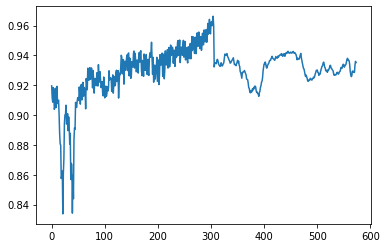

In [24]:
import matplotlib.pyplot as plt

score_idx=score_idx1+score_idx2
x = range(0, 574)
plt.plot(x,score_idx)

In [8]:
np.min(score_idx)

0.8337854657679671

In [10]:
np.shape(score_idx)

(574,)